NameError: name 'ser' is not defined

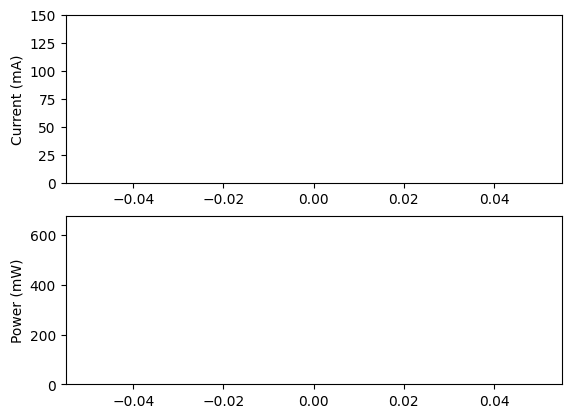

In [6]:
import serial
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Initialize serial communication with your device (replace 'COMx' with your actual serial port)
#ser = serial.Serial('/dev/ttyACM2', baudrate=230400)

sensor_to_test = "NextPM"
current_upper_bound = 150
current_lower_bound = 40

# Create empty lists to store current and power data
current_data = []
power_data = []

ticker = 0

# Create two subplots for current and power
fig, (ax1, ax2) = plt.subplots(2, 1)

# Set titles and labels for the subplots

ax1.set_ylabel('Current (mA)')
ax1.set_ylim(0, current_upper_bound)
ax2.set_ylabel('Power (mW)')
ax2.set_ylim(0, (current_upper_bound * 4.5))

# Initialize empty lines for live plotting
current_line, = ax1.plot([], [], 'r-')
power_line, = ax2.plot([], [], 'b-')

# Function to update the plots
def update_plot():
    current_line.set_data(range(len(current_data)), current_data)
    power_line.set_data(range(len(power_data)), power_data)
    ax1.set_xlim(0, len(current_data))
    
    ax2.set_xlim(0, len(power_data))
    
    clear_output(wait=True)
    display(fig)

try:
    while True:
        # Read data from the serial device
        data = ser.readline().decode().strip().split(', ')
        if len(data) == 2:

            try:
                # Parse the current and power values
                current, power = map(float, data)
                if current_lower_bound <= current <= current_upper_bound:
                    if (current_lower_bound*4.5) <= power <= (current_upper_bound*4.5):
                        # Append data to the lists
                        current_data.append(current)
                        power_data.append(power)

                        # Update the live plots
                        update_plot()
                        ticker = ticker+1
                        if ticker == 4000:
                            break
            except ValueError:
                pass
            
            
except KeyboardInterrupt:
    print("Serial communication stopped.")
    ser.close()

In [52]:
import csv

sensor_to_test = "SDS011"

# Specify the file name for the CSV file
csv_file = f'{sensor_to_test}_power.csv'  # Make sure to use the correct file name

# Initialize empty lists to store data
current_data = []
power_data = []

# Read data from the CSV file
try:
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)  # Skip the header row
        for row in reader:
            current, power = map(float, row)
            current_data.append(current)
            power_data.append(power)

    print(f'Data has been read from {csv_file}')
except FileNotFoundError:
    print(f'{csv_file} not found. Make sure to specify the correct file name.')


Data has been read from SDS011_power.csv


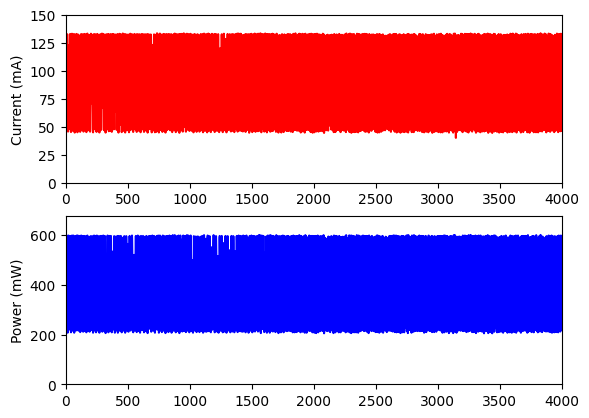

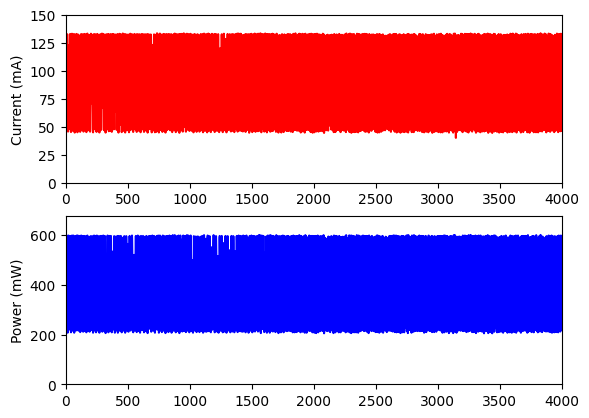

In [53]:
# Create two subplots for current and power
fig, (ax1, ax2) = plt.subplots(2, 1)

# Set titles and labels for the subplots

ax1.set_ylabel('Current (mA)')
ax1.set_ylim(0, current_upper_bound)
ax2.set_ylabel('Power (mW)')
ax2.set_ylim(0, (current_upper_bound * 4.5))

# Initialize empty lines for live plotting
current_line, = ax1.plot([], [], 'r-')
power_line, = ax2.plot([], [], 'b-')

# Function to update the plots

current_line.set_data(range(len(current_data)), current_data)
power_line.set_data(range(len(power_data)), power_data)
ax1.set_xlim(0, len(current_data))

ax2.set_xlim(0, len(power_data))

clear_output(wait=True)
display(fig)

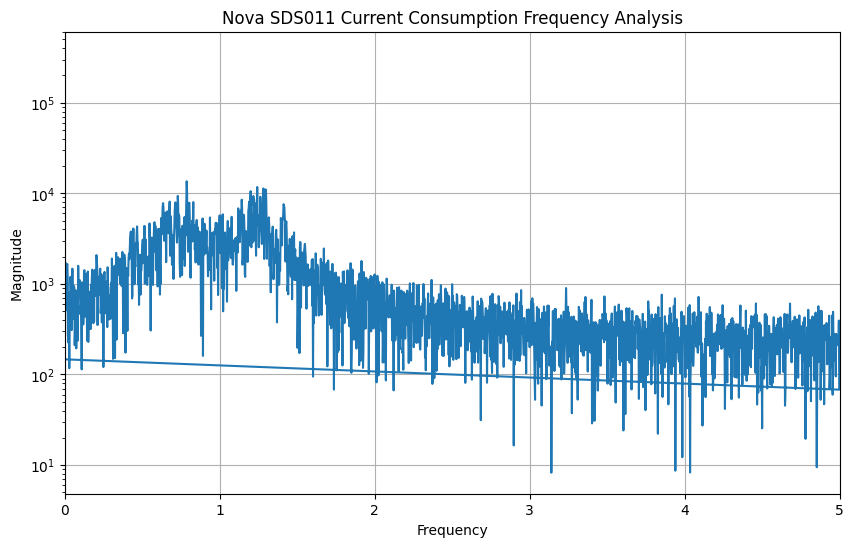

In [58]:
import numpy as np

# Perform Fast Fourier Transform (FFT) on the current data
# Assuming the current_data array contains your collected current data
fft_result = np.fft.fft(current_data)

# Calculate the frequencies corresponding to the FFT result
n = len(current_data)
sample_rate = 10  # Adjust this if your data was collected at a different sampling rate
frequencies = np.fft.fftfreq(n, 1 / sample_rate)

# Find the magnitudes of the FFT result
magnitudes = np.abs(fft_result)

# Plot the frequency domain data
plt.figure(figsize=(10, 6))
plt.title('Nova SDS011 Current Consumption Frequency Analysis')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.semilogy(frequencies, magnitudes)
plt.xlim(0, sample_rate / 2)  # Display the positive frequency range only (Nyquist limit)
plt.grid()

# Show the plot
plt.show()

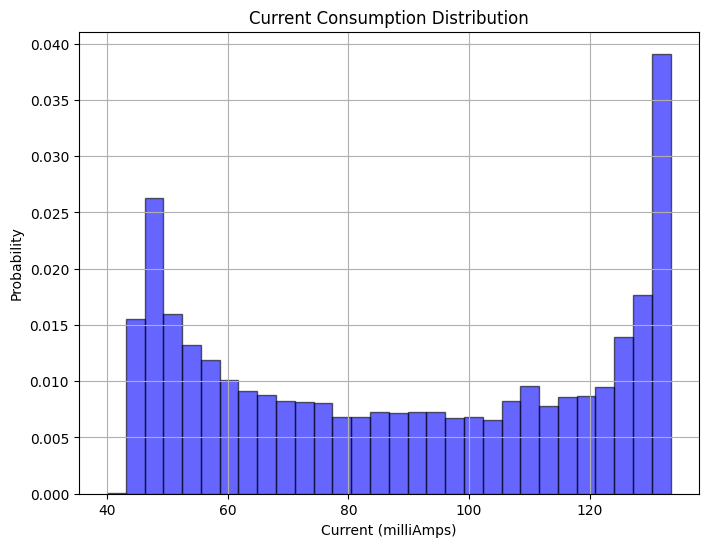

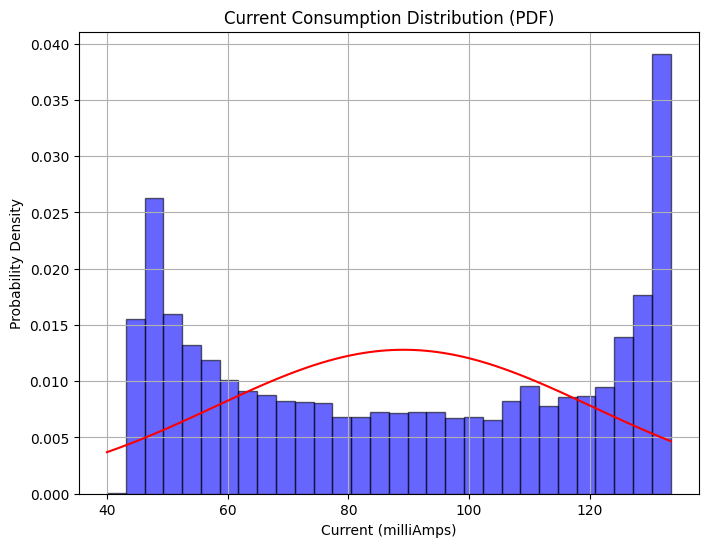

In [55]:
import scipy.stats as stats

# Create a histogram plot
plt.figure(figsize=(8, 6))
plt.hist(current_data, bins=30, density=True, alpha=0.6, color='b', edgecolor='k')
plt.title('Current Consumption Distribution')
plt.xlabel('Current (milliAmps)')
plt.ylabel('Probability')
plt.grid(True)

# Alternatively, create a probability density function (PDF) plot
plt.figure(figsize=(8, 6))
plt.hist(current_data, bins=30, density=True, alpha=0.6, color='b', edgecolor='k')
plt.plot(np.linspace(min(current_data), max(current_data), 100), 
         stats.norm.pdf(np.linspace(min(current_data), max(current_data), 100), np.mean(current_data), np.std(current_data)), 
         'r-')
plt.title('Current Consumption Distribution (PDF)')
plt.xlabel('Current (milliAmps)')
plt.ylabel('Probability Density')
plt.grid(True)

# Show the plot
plt.show()

In [56]:
# Compute descriptive statistics
mean = np.mean(current_data)
median = np.median(current_data)
std_dev = np.std(current_data)
min_val = np.min(current_data)
max_val = np.max(current_data)
q1 = np.percentile(current_data, 25)
q3 = np.percentile(current_data, 75)

# Print the statistics
print("Descriptive Statistics for the sensor Current consumption:")
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Minimum:", min_val)
print("25th Percentile (Q1):", q1)
print("75th Percentile (Q3):", q3)
print("Maximum:", max_val)

Descriptive Statistics for the sensor Current consumption:
Mean: 89.14686
Median: 88.52
Standard Deviation: 31.18157191901011
Minimum: 40.0
25th Percentile (Q1): 58.0
75th Percentile (Q3): 120.92
Maximum: 133.4


In [57]:
import csv

# Specify the file name for the CSV file
csv_file = f'{sensor_to_test}_power.csv'

# Combine current_data and power_data into a list of tuples
data_to_export = list(zip(current_data, power_data))

# Write the data to a CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Current (milliAmps)', 'Power (milliWatts)'])  # Header row
    writer.writerows(data_to_export)

print(f'Data has been exported to {csv_file}')

Data has been exported to SDS011_power.csv
